In [48]:
from __future__ import division, print_function
import os
import numpy as np
from numpy.random import randn
import pylab as pl
import psycopg2
from pandas import Series, DataFrame
import pandas
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
#userl=raw_input('type user name: ')
#passcode=raw_input('type password: ')

type user name: 
type password: 


In [21]:
conn = psycopg2.connect("dbname='opendata'  user='lmf445' host='compute.cusp.nyu.edu'")

OperationalError: could not connect to server: Connection refused
	Is the server running on host "compute.cusp.nyu.edu" (128.122.72.166) and accepting
	TCP/IP connections on port 5432?


In [53]:
#https://datahub.cusp.nyu.edu/dataset/61e9e31c-9393-4902-9e99-3629d5850396/resource/2cd0e496-c5eb-45eb-87cc-86f95ec21298/download/dailytasksv1dictionary20160607-2.csv
#df = pd.read_csv("https://datahub.cusp.nyu.edu/dataset/61e9e31c-9393-4902-9e99-3629d5850396/resource/2cd0e496-c5eb-45eb-87cc-86f95ec21298/download/dailytasksv1dictionary20160607-2.csv")#
 
print((os.getenv("DFDATA"))+'cmmx-fzsb/1473437627/cmmx-fzsb.csv')

/gws/open/NYCOpenData/nycopendata/datacmmx-fzsb/1473437627/cmmx-fzsb.csv


In [54]:
#/gws/open/NYCOpenData/nycopendata/data/cmmx-fzsb/1473437627/cmmx-fzsb.csv

df = pd.read_csv((os.getenv("DFDATA"))+'/cmmx-fzsb/1473437627/cmmx-fzsb.csv')
df.columns  

Index([u'Ticket Number', u'Violation Date', u'Violation Time',
       u'Issuing Agency', u'Respondent Last Name', u'Respondent First Name',
       u'Balance Due', u'Violation Location (Borough)',
       u'Violation Location (Block No.)', u'Violation Location (Lot No.)',
       u'Violation Location (House #)', u'Violation Location (Street Name)',
       u'Violation Location (Floor)', u'Violation Location (City)',
       u'Violation Location (Zip Code)', u'Violation Location (State Name)',
       u'Respondent Address (Borough)', u'Respondent Address (House #)',
       u'Respondent Address (Street Name)', u'Respondent Address (City)',
       u'Respondent Address (Zip Code)', u'Respondent Address (State Name)',
       u'Hearing Status', u'Hearing Result', u'Scheduled Hearing Location',
       u'Hearing Date', u'Hearing Time', u'Decision Location (Borough)',
       u'Decision Date', u'Total Violation Amount', u'Violation Details',
       u'Date Judgment Docketed',
       u'Respondent Addres

In [55]:
df.head()

,Ticket Number,Violation Date,Violation Time,Issuing Agency,Respondent Last Name,Respondent First Name,Balance Due,Violation Location (Borough),Violation Location (Block No.),Violation Location (Lot No.),...,Charge #8: Code Description,Charge #8: Infraction Amount,Charge #9: Code,Charge #9: Code Section,Charge #9: Code Description,Charge #9: Infraction Amount,Charge #10: Code,Charge #10: Code Section,Charge #10: Code Description,Charge #10: Infraction Amount
0,040292216P,02/23/2007,09:27:00,DOS - ENFORCEMENT AGENTS,WILARD REALTY,NaN,$-25.00,MANHATTAN,885,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,040228138M,08/17/2009,08:44:00,DOS - ENFORCEMENT AGENTS,557 W 185 ST CORP,NaN,$0.00,MANHATTAN,2157,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,043420656L,06/10/2009,15:02:00,DOS - ENFORCEMENT AGENTS,351-353 21ST STREET REALTY LLC,NaN,$100.00,MANHATTAN,892,7501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,043460062K,08/26/2010,08:32:00,DOS - ENFORCEMENT AGENTS,2461 AMSTERDAM I LLC,NaN,$0.00,MANHATTAN,2149,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,043500125M,10/29/2010,08:55:00,DOS - ENFORCEMENT AGENTS,2461 AMSTERDAM I LLC,NaN,$0.00,MANHATTAN,2149,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.drop([u'Ticket Number', u'Violation Date', u'Violation Time',
       u'Issuing Agency', u'Respondent Last Name', u'Respondent First Name',
       u'Balance Due', u'Violation Location (Borough)',
       u'Violation Location (House #)', u'Violation Location (Street Name)',
       u'Violation Location (Floor)', u'Violation Location (City)',
       u'Violation Location (Zip Code)', u'Violation Location (State Name)',
       u'Respondent Address (Borough)', u'Respondent Address (House #)',
       u'Respondent Address (Street Name)', u'Respondent Address (City)',
       u'Respondent Address (Zip Code)', u'Respondent Address (State Name)',
       u'Hearing Status', u'Hearing Result', u'Scheduled Hearing Location',
       u'Hearing Date', u'Hearing Time', u'Decision Location (Borough)',
       u'Decision Date', u'Total Violation Amount', u'Violation Details',
       u'Date Judgment Docketed',
       u'Respondent Address or Facility Number(For FDNY and DOB Tickets)',
       u'Penalty Imposed', u'Paid Amount',
       u'Additional Penalties or Late Fees', u'Compliance Status',
       u'Violation Description', u'Charge #1: Code',
       u'Charge #1: Code Section', u'Charge #1: Code Description',
       u'Charge #1: Infraction Amount', u'Charge #2: Code',
       u'Charge #2: Code Section', u'Charge #2: Code Description',
       u'Charge #2: Infraction Amount', u'Charge #3: Code',
       u'Charge #3: Code Section', u'Charge #3: Code Description',
       u'Charge #3: Infraction Amount', u'Charge #4: Code',
       u'Charge #4: Code Section', u'Charge #4: Code Description',
       u'Charge #4: Infraction Amount', u'Charge #5: Code',
       u'Charge #5: Code Section', u'Charge #5: Code Description',
       u'Charge #5: Infraction Amount', u'Charge #6: Code',
       u'Charge #6: Code Section', u'Charge #6: Code Description',
       u'Charge #6: Infraction Amount', u'Charge #7: Code',
       u'Charge #7: Code Section', u'Charge #7: Code Description',
       u'Charge #7: Infraction Amount', u'Charge #8: Code',
       u'Charge #8: Code Section', u'Charge #8: Code Description',
       u'Charge #8: Infraction Amount', u'Charge #9: Code',
       u'Charge #9: Code Section', u'Charge #9: Code Description',
       u'Charge #9: Infraction Amount', u'Charge #10: Code',
       u'Charge #10: Code Section', u'Charge #10: Code Description',
       u'Charge #10: Infraction Amount'],axis = 1)

,Violation Location (Block No.),Violation Location (Lot No.)
0,885,51
1,2157,61
2,892,7501
3,2149,8
4,2149,8
5,570,8
6,2156,19
7,570,7501
8,2155,89
9,2155,89


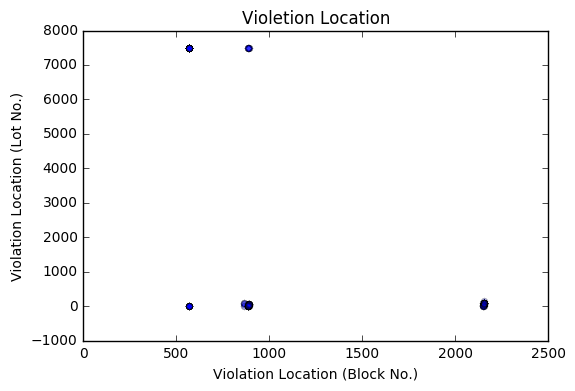

In [57]:
plot1 = df.plot.scatter(x='Violation Location (Block No.)', y='Violation Location (Lot No.)', alpha=.01)
plot1.set_title('Violetion Location')

In [58]:
df2 = pd.read_csv("/gws/open/NYCOpenData/nycopendata/data/cmmx-fzsb/1473437627/cmmx-fzsb.csv")
df2 = df2.drop([u'Ticket Number', u'Violation Date',u'Violation Location (Block No.)', u'Violation Location (Lot No.)',
       u'Issuing Agency', u'Respondent Last Name', u'Respondent First Name', u'Violation Location (Borough)',
       u'Violation Location (House #)', u'Violation Location (Street Name)',
       u'Violation Location (Floor)', u'Violation Location (City)',
       u'Violation Location (Zip Code)', u'Violation Location (State Name)',
       u'Respondent Address (Borough)', u'Respondent Address (House #)',
       u'Respondent Address (Street Name)', u'Respondent Address (City)',
       u'Respondent Address (Zip Code)', u'Respondent Address (State Name)',
       u'Hearing Status', u'Hearing Result', u'Scheduled Hearing Location',
       u'Hearing Date', u'Hearing Time', u'Decision Location (Borough)',
       u'Decision Date', u'Total Violation Amount', u'Violation Details',
       u'Date Judgment Docketed',
       u'Respondent Address or Facility Number(For FDNY and DOB Tickets)',
       u'Penalty Imposed', u'Paid Amount',
       u'Additional Penalties or Late Fees', u'Compliance Status',
       u'Violation Description', u'Charge #1: Code',
       u'Charge #1: Code Section', u'Charge #1: Code Description',
       u'Charge #1: Infraction Amount', u'Charge #2: Code',
       u'Charge #2: Code Section', u'Charge #2: Code Description',
       u'Charge #2: Infraction Amount', u'Charge #3: Code',
       u'Charge #3: Code Section', u'Charge #3: Code Description',
       u'Charge #3: Infraction Amount', u'Charge #4: Code',
       u'Charge #4: Code Section', u'Charge #4: Code Description',
       u'Charge #4: Infraction Amount', u'Charge #5: Code',
       u'Charge #5: Code Section', u'Charge #5: Code Description',
       u'Charge #5: Infraction Amount', u'Charge #6: Code',
       u'Charge #6: Code Section', u'Charge #6: Code Description',
       u'Charge #6: Infraction Amount', u'Charge #7: Code',
       u'Charge #7: Code Section', u'Charge #7: Code Description',
       u'Charge #7: Infraction Amount', u'Charge #8: Code',
       u'Charge #8: Code Section', u'Charge #8: Code Description',
       u'Charge #8: Infraction Amount', u'Charge #9: Code',
       u'Charge #9: Code Section', u'Charge #9: Code Description',
       u'Charge #9: Infraction Amount', u'Charge #10: Code',
       u'Charge #10: Code Section', u'Charge #10: Code Description',
       u'Charge #10: Infraction Amount'],axis = 1)

In [59]:
df21 = df2.dropna() #delete NaN values
df21 = df21.reset_index()
df21

,index,Violation Time,Balance Due
0,0,09:27:00,$-25.00
1,1,08:44:00,$0.00
2,2,15:02:00,$100.00
3,3,08:32:00,$0.00
4,4,08:55:00,$0.00
5,5,07:24:00,$0.00
6,6,13:30:00,$0.00
7,7,12:30:00,$-1500.00
8,8,13:01:00,$600.00
9,9,14:40:00,$0.00


In [60]:
daytime=[]
hora = []
print(type(hora))
daytime = df21['Violation Time']
n = len(daytime)
print(n,daytime[140:530])
cell=daytime[152]
print(cell[:-6])
#print(daytime[300],n)

<type 'list'>
530 140    08:39:00
141    14:16:00
142    08:55:00
143    10:10:00
144    13:14:00
145    10:29:00
146    08:05:00
147    08:55:00
148    07:09:00
149    11:21:00
150    08:00:00
151    13:00:00
152    10:30:00
153     1:31:00
154    12:05:00
155    13:45:00
156    12:00:00
157    13:05:00
158    15:40:00
159    10:30:00
160    10:30:00
161    11:30:00
162    17:20:00
163     7:10:00
164    11:25:00
165    13:05:00
166    11:20:00
167     8:45:00
168     9:10:00
169    21:40:00
         ...   
500    08:20:00
501    15:00:00
502    15:00:00
503    08:05:00
504    07:51:00
505    08:40:00
506    10:30:00
507    14:50:00
508    13:50:00
509    13:50:00
510    13:50:00
511    13:50:00
512    13:50:00
513    13:10:00
514    14:40:00
515    11:50:00
516    08:38:00
517    12:00:00
518    12:30:00
519    09:30:00
520    12:32:00
521    06:57:00
522    11:45:00
523    12:30:00
524    09:00:00
525    06:47:00
526    10:08:00
527    11:45:00
528    12:30:00
529    11:15:00
Name: 

In [61]:
hora = []
for j in xrange(0,n):
    cell=daytime[j]
    #print(j)
    cell=int(cell[:-6])
    hora.append(cell)

print(hora)


[9, 8, 15, 8, 8, 7, 13, 12, 13, 14, 12, 11, 15, 15, 12, 8, 12, 6, 9, 7, 8, 11, 8, 8, 12, 9, 7, 14, 8, 7, 12, 11, 10, 0, 8, 8, 6, 12, 11, 11, 3, 14, 5, 5, 4, 12, 9, 9, 11, 3, 8, 8, 11, 8, 12, 12, 17, 14, 11, 13, 14, 14, 11, 11, 12, 12, 12, 11, 11, 15, 12, 12, 12, 10, 10, 13, 13, 13, 11, 11, 15, 12, 12, 12, 12, 14, 18, 8, 9, 10, 16, 9, 9, 1, 1, 1, 1, 18, 3, 8, 16, 11, 9, 9, 1, 10, 7, 9, 10, 3, 9, 9, 9, 9, 15, 3, 14, 15, 9, 1, 12, 13, 14, 8, 11, 10, 8, 10, 2, 12, 13, 14, 6, 12, 8, 2, 9, 11, 12, 11, 8, 14, 8, 10, 13, 10, 8, 8, 7, 11, 8, 13, 10, 1, 12, 13, 12, 13, 15, 10, 10, 11, 17, 7, 11, 13, 11, 8, 9, 21, 21, 8, 9, 10, 9, 9, 8, 9, 10, 9, 9, 9, 8, 7, 8, 8, 9, 10, 9, 15, 8, 10, 7, 7, 12, 9, 7, 8, 8, 12, 2, 18, 10, 12, 14, 12, 10, 9, 13, 14, 12, 7, 11, 11, 10, 13, 10, 13, 7, 7, 7, 7, 2, 2, 8, 8, 11, 13, 14, 11, 10, 18, 13, 14, 7, 24, 7, 13, 12, 11, 7, 12, 11, 10, 9, 12, 12, 11, 12, 8, 8, 14, 12, 10, 2, 3, 2, 3, 7, 5, 1, 12, 11, 12, 10, 1, 12, 3, 1, 1, 1, 4, 1, 9, 11, 10, 12, 12, 10, 4, 4, 4

In [62]:
df21['Time']=hora
print(len(hora))
df21

530


,index,Violation Time,Balance Due,Time
0,0,09:27:00,$-25.00,9
1,1,08:44:00,$0.00,8
2,2,15:02:00,$100.00,15
3,3,08:32:00,$0.00,8
4,4,08:55:00,$0.00,8
5,5,07:24:00,$0.00,7
6,6,13:30:00,$0.00,13
7,7,12:30:00,$-1500.00,12
8,8,13:01:00,$600.00,13
9,9,14:40:00,$0.00,14


In [63]:
df21.columns

Index([u'index', u'Violation Time', u'Balance Due', u'Time'], dtype='object')

In [64]:
dtdinero=[]
dinero = []
print(type(hora))
dtdinero = df21['Balance Due']
n = len(dtdinero)

for j in xrange(0,n):
    cell=dtdinero[j]
    #print(j)
    cell=float(cell[1:])
    dinero.append(cell)

print(dinero)

df21['Balance']=dinero

df21

<type 'list'>
[-25.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, -1500.0, 600.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 200.0, 750.0, 0.0, 0.0, 0.0, 300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 1000.0, 1000.0, 0.0, 0.0, 0.0, 0.0, 100.0, 1000.0, 0.0, 0.0, -50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 300.0, 0.0, 0.0, 400.0, 0.0, 1230.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000.0, 1200.0, 1000.0, 0.0, 0.0, 500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 2400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4000.0, 4000.0, 0.0, 0.0, 0.0, 250.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1830.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -350.0, -504.0, 250.0, -50.0, -200.0, -74.0, -250.0, -300.0, -100.0, -75.0, -400.0, -25.0, -25.0, 0.0, -80.0, 0.0, -250.0, -80.0, -20.0, -25.0, -395.0, 0.0, 0.0, 0

,index,Violation Time,Balance Due,Time,Balance
0,0,09:27:00,$-25.00,9,-25.0
1,1,08:44:00,$0.00,8,0.0
2,2,15:02:00,$100.00,15,100.0
3,3,08:32:00,$0.00,8,0.0
4,4,08:55:00,$0.00,8,0.0
5,5,07:24:00,$0.00,7,0.0
6,6,13:30:00,$0.00,13,0.0
7,7,12:30:00,$-1500.00,12,-1500.0
8,8,13:01:00,$600.00,13,600.0
9,9,14:40:00,$0.00,14,0.0


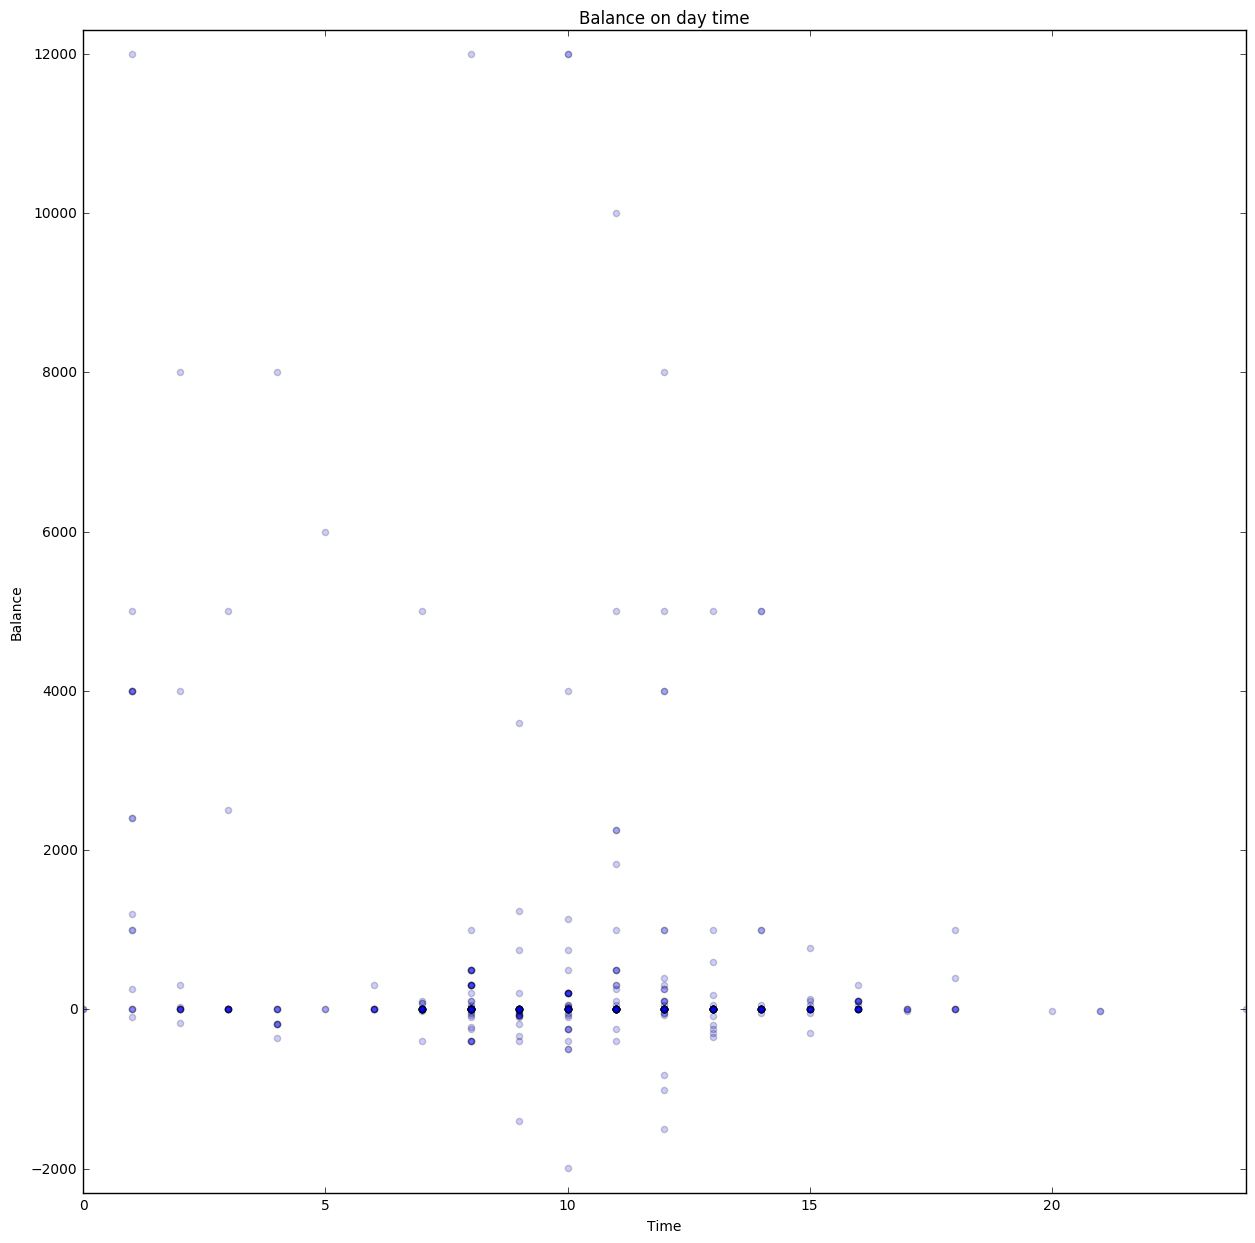

In [65]:
balance = df21.plot(x='Time', y='Balance', kind="scatter",alpha=0.2, figsize=(15,15),xlim=(0,24), ylim=(-2300,12300))
balance.set_title("Balance on day time")

In [66]:
df.to_cvs(sdffqf.csv, index=False)

AttributeError: 'DataFrame' object has no attribute 'to_cvs'